##### Forecasting Timeseries Data Using Facebook FbProphet

Steps Required With FbProphet
1. Introduction And Installation
2. Data Preprocessing With Time Seires
3. Model Fitting
4. Obtaining The Forecasts
5. Plotting The Forecasts
6. Cross Validation
7. Computing Performance Metrics
8. Visualize the Performance MEtrics
9. Conclusions


In [1]:
#pip install pystan
#conda install -c conda-forge fbprophet
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading our dataset and then displaying the first 5 records
df=pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [3]:
#Displaying the last 5 records
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


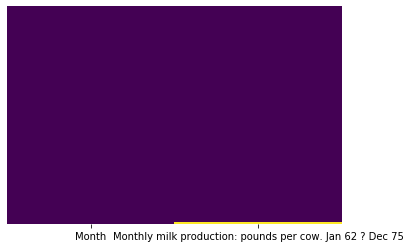

In [4]:
##PREPROCESSING THE DATA 
'''This step helps us identify columns with missing values'''

sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis');

The yellow color in the figure indicates that there is some missing data

In [5]:
#Tidying up the df table by dropping the 168 row
df.drop(168,axis=0,inplace=True)

In [6]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


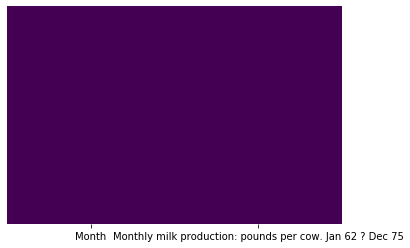

In [7]:
'''This step helps us identify columns with missing values'''

sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis');

There are no longer any missing values as per the above figure as there are no yellow marks

In [8]:
#FbProphet uses ds to represent a date column and y for values
df.columns=["ds","y"]

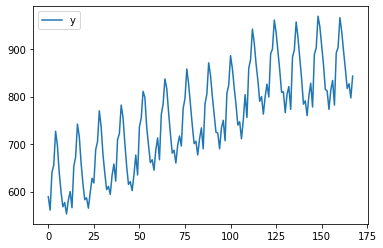

In [9]:
df.plot();

In [10]:
#Displaying the first 5 records
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [11]:
#checking the data types of the two columns in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      168 non-null    object 
 1   y       168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [12]:
df['ds']=pd.to_datetime(df['ds'])

In [13]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [14]:
#checking the data types of the two columns in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      168 non-null    datetime64[ns]
 1   y       168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


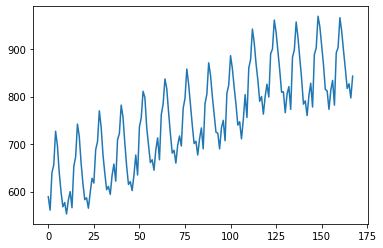

In [15]:
#Plotting the values 'y'
df['y'].plot();

In [16]:
#Importing the prophet
from fbprophet import Prophet

In [17]:
#Displaying the 
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [18]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [19]:
### intiialize the Prophet model and fitting it to the df dataset 
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\frede\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [20]:
model

**We want to confirm the fact that it has disabled weekly and daily seasonalities and is doing a yearly seasonality
By using:**

#model.seasonalities
#model.components

In [21]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [22]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [23]:
#### Creating future dates for the next 365 days
future_dates=model.make_future_dataframe(periods=365)

In [24]:
df.tail()

,ds,y
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


We see the df tail ended at 1975-12-01. When we add 365 extra days we find that 1976 dates are
will be added to the ds column when we run future_dates 

In [25]:

future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


**Prediction, which will come with the following columns shown in the list**

['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat']
       
**Note:** The yhat is the output feature

In [26]:
prediction=model.predict(future_dates)

In [27]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.810747,577.269439,597.076571,606.810747,606.810747,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,0.0,0.0,0.0,586.697151
1,1962-02-01,608.536993,536.061232,555.623732,608.536993,608.536993,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,0.0,0.0,0.0,545.999137
2,1962-03-01,610.096182,631.675172,650.883530,610.096182,610.096182,31.410418,31.410418,31.410418,31.410418,31.410418,31.410418,0.0,0.0,0.0,641.506601
3,1962-04-01,611.822427,649.589455,668.325066,611.822427,611.822427,46.733066,46.733066,46.733066,46.733066,46.733066,46.733066,0.0,0.0,0.0,658.555494
4,1962-05-01,613.492987,712.013067,731.380802,613.492987,613.492987,108.064296,108.064296,108.064296,108.064296,108.064296,108.064296,0.0,0.0,0.0,721.557284


In [29]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.561801,804.944543,826.977250
529,1976-11-27,818.770979,807.551626,830.593907
530,1976-11-28,822.159021,811.126153,833.361463
531,1976-11-29,825.663235,814.813976,836.592969
532,1976-11-30,829.213819,817.587444,840.557436


In [30]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,586.697151,577.269439,597.076571
1,1962-02-01,545.999137,536.061232,555.623732
2,1962-03-01,641.506601,631.675172,650.883530
3,1962-04-01,658.555494,649.589455,668.325066
4,1962-05-01,721.557284,712.013067,731.380802


#### Plotting the Forecasts
 
Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset. The light blue shadow that we wee represent the trend.

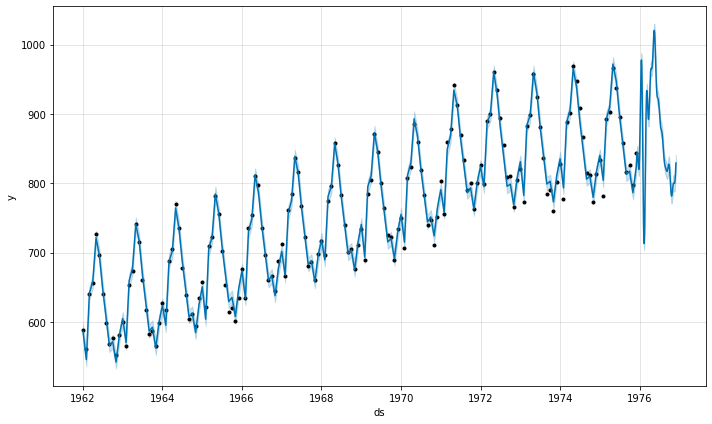

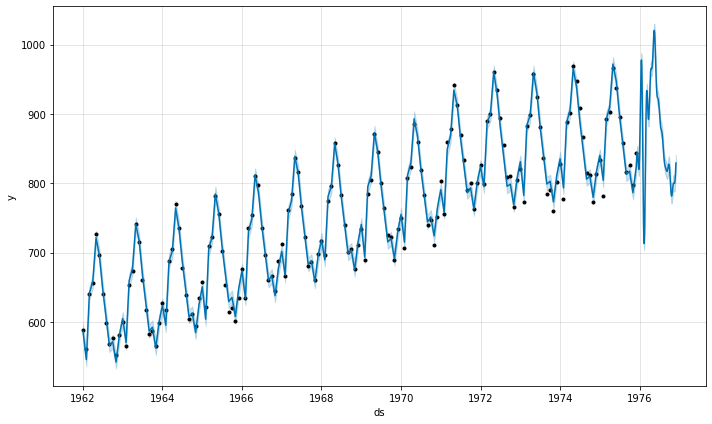

In [31]:
#### plot the predicted projection
model.plot(prediction)

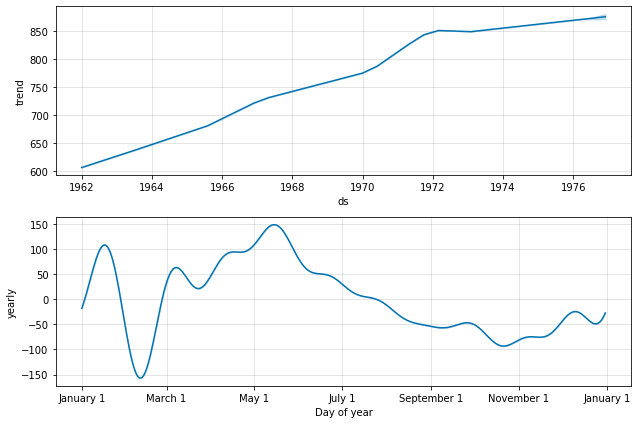

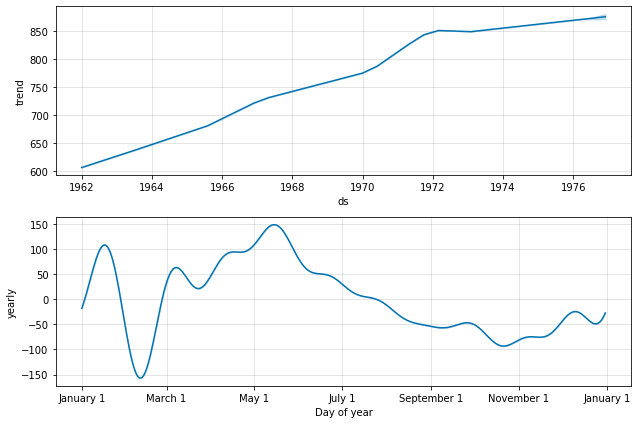

In [32]:
##### Visualizing the fraphs for each of the Components[Trends,Yearly]
model.plot_components(prediction)

#### Cross Validation
 
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

1. horizon the forecast horizon
2. initial the size of the initial training period-how many days we actually want
3. period the spacing between cutoff dates-this is usually half of the forecast days

In [33]:
df.shape

(168, 2)

In [34]:
from fbprophet.diagnostics import cross_validation


In [35]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00
C:\Users\frede\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


The above implies that we have the data between 1965-01-22 00:00:00 and 1974-12-01 00:00:00 and we are trying to do a 
cross validation

In [36]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [37]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,629.706391,628.251714,631.643415,622.0,1965-01-22
1,1965-03-01,712.739970,707.619994,719.305341,709.0,1965-01-22
2,1965-04-01,731.118164,720.051375,744.516945,722.0,1965-01-22
3,1965-05-01,800.091760,781.901543,820.281517,782.0,1965-01-22
4,1965-06-01,768.349331,740.765172,798.372241,756.0,1965-01-22


#### Obtaining the Performance Metrics
 
**We use the performance_metrics utility to compute** 

1. the Mean Squared Error(MSE), 

2. Root Mean Squared Error(RMSE),

3. Mean Absolute Error(MAE), 

4. Mean Absolute Percentage Error(MAPE) and 

5. the coverage of the the yhat_lower and yhat_upper estimates.

In [43]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,254.213828,15.944084,12.426328,0.015982,0.013692,0.32
1,41 days,252.292064,15.883704,12.348837,0.015919,0.013692,0.32
2,42 days,267.463848,16.354322,12.817196,0.016570,0.014528,0.32
3,43 days,268.236328,16.377922,12.952623,0.016783,0.014528,0.32
4,46 days,253.593855,15.924630,12.602717,0.016295,0.014528,0.32
...,...,...,...,...,...,...,...
180,357 days,876.440065,29.604730,22.376918,0.028112,0.018389,0.40
181,360 days,683.253431,26.139117,19.320390,0.023951,0.017203,0.44
182,361 days,670.162569,25.887498,18.912627,0.023537,0.014779,0.44
183,362 days,652.884471,25.551604,18.184354,0.022704,0.013880,0.48


The metrics figures above are calculated using the y and the yhat

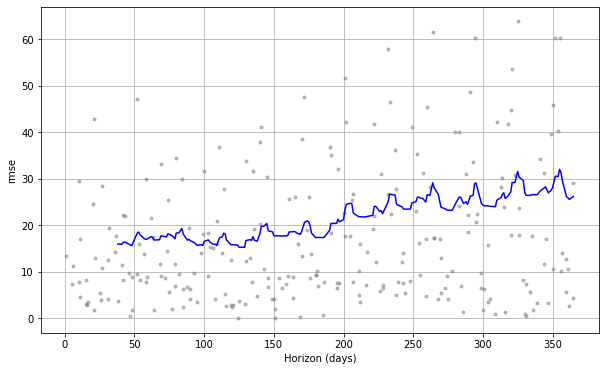

In [39]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')